In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("co2_emissions_kt_by_country.csv")

df.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [6]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB


In [7]:
#Top 10 columns with most missing data
df.isnull().sum().sort_values(ascending=False).head(10)

country_code    0
country_name    0
year            0
value           0
dtype: int64

In [8]:
print("\nStatistical Summary:")
display(df.describe())


Statistical Summary:


,year,value
count,13953.000000,1.395300e+04
mean,1990.732316,8.254983e+05
std,17.187585,2.788923e+06
min,1960.000000,-8.067400e+01
25%,1976.000000,1.100000e+03
50%,1992.000000,1.390000e+04
75%,2006.000000,1.642779e+05
max,2019.000000,3.434401e+07


**CO2 emission value cannot be negative.**


In [10]:
print("\nNegative Emission Records:")
display(df[df["value"] < 0 ])


Negative Emission Records:


,country_code,country_name,year,value
11002,SEN,Senegal,1968,-80.674


In [11]:
print("\nNumber of negative records:", (df['value'] < 0).sum())



Number of negative records: 1


In [17]:
df = df[df['value'] >= 0]
# Subtract negative values from data

In [21]:
print("\nNew Statistical Summary After Cleaning:")
display(df.describe())


New Statistical Summary After Cleaning:


,year,value
count,13952.000000,1.395200e+04
mean,1990.733945,8.255575e+05
std,17.187123,2.789014e+06
min,1960.000000,0.000000e+00
25%,1976.000000,1.100000e+03
50%,1992.000000,1.391000e+04
75%,2006.000000,1.642835e+05
max,2019.000000,3.434401e+07


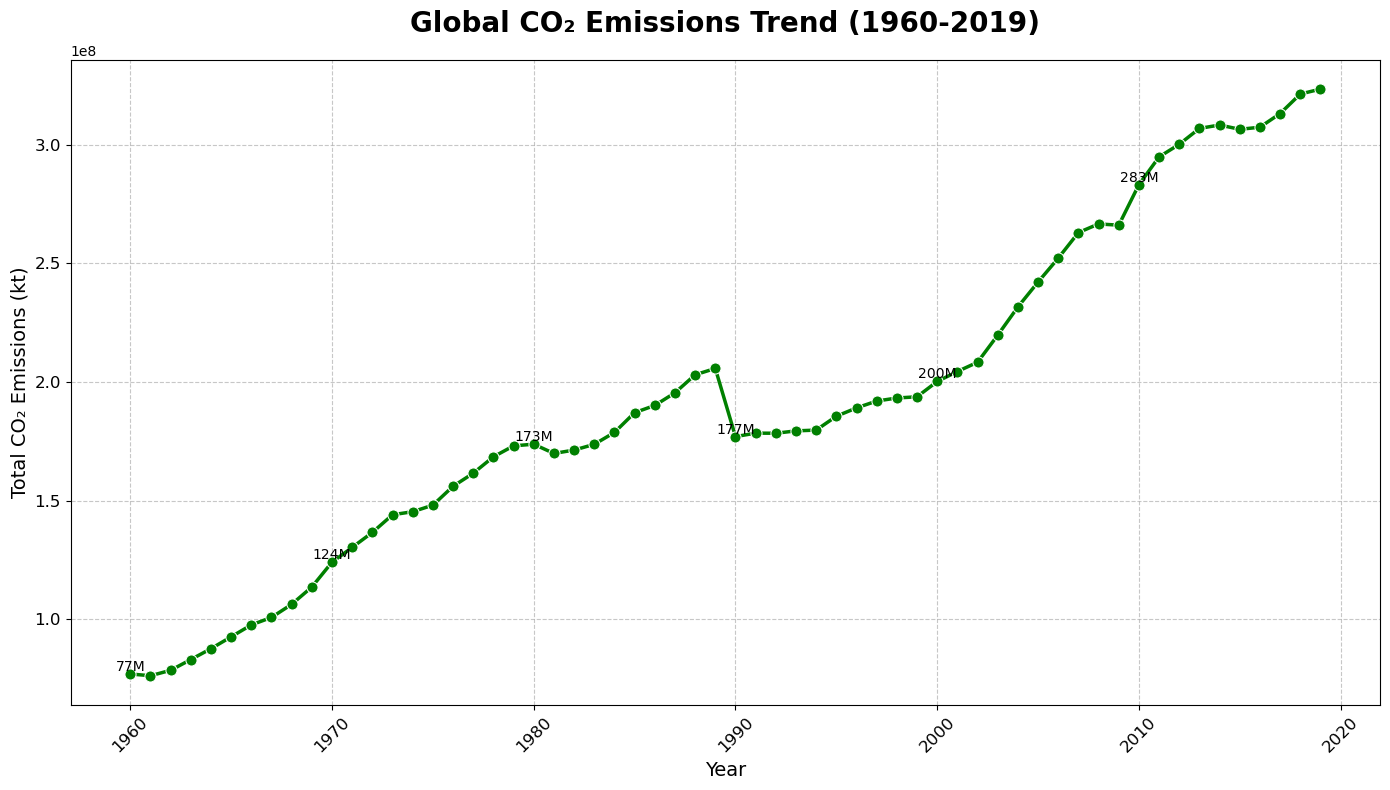

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi gruplama ve toplam emisyon hesaplama
yearly_total_emission = df.groupby('year')['value'].sum()

# Grafik oluşturma
plt.figure(figsize=(14, 8))
sns.lineplot(
    x=yearly_total_emission.index,
    y=yearly_total_emission.values,
    marker='o',
    color='green',
    linewidth=2.5,
    markersize=8
)

# Başlık ve etiketler
plt.title('Global CO₂ Emissions Trend (1960-2019)', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total CO₂ Emissions (kt)', fontsize=14)

# Eksen ayarları
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Belirli yıllara veri değeri ekleme (Her 10 yılda bir)
for x, y in zip(yearly_total_emission.index[::10], yearly_total_emission.values[::10]):
    plt.text(x, y, f'{int(y/1e6)}M', ha='center', va='bottom', fontsize=10, color='black')

plt.show()


In [24]:
#Emission Change Rate (Annual Increase)
yearly_total_emission_diff = yearly_total_emission.diff()  
print(yearly_total_emission_diff)

year
1960             NaN
1961   -7.365985e+05
1962    2.286828e+06
1963    4.528130e+06
1964    4.587899e+06
1965    4.993053e+06
1966    5.016128e+06
1967    3.153124e+06
1968    5.524633e+06
1969    7.280802e+06
1970    1.047766e+07
1971    6.212631e+06
1972    6.302487e+06
1973    7.449525e+06
1974    1.281812e+06
1975    2.758370e+06
1976    7.943037e+06
1977    5.511775e+06
1978    6.907349e+06
1979    4.615040e+06
1980    7.026186e+05
1981   -3.896228e+06
1982    1.422537e+06
1983    2.407822e+06
1984    5.018883e+06
1985    8.334159e+06
1986    3.032154e+06
1987    5.330881e+06
1988    7.586790e+06
1989    2.669079e+06
1990   -2.870707e+07
1991    1.456721e+06
1992   -4.491960e+04
1993    9.998477e+05
1994    3.287538e+05
1995    5.833610e+06
1996    3.507559e+06
1997    2.896508e+06
1998    1.275155e+06
1999    5.153023e+05
2000    6.448773e+06
2001    4.196488e+06
2002    3.905151e+06
2003    1.140329e+07
2004    1.189109e+07
2005    1.049762e+07
2006    1.005414e+07
2007    

In [27]:
# Years of negative changes
negative_years = yearly_total_emission_diff[yearly_total_emission_diff < 0]
print(negative_years)

year
1961   -7.365985e+05
1981   -3.896228e+06
1990   -2.870707e+07
1992   -4.491960e+04
2009   -5.297364e+05
2015   -1.820181e+06
Name: value, dtype: float64


In [29]:
# Subtract negative values
corrected_emission = yearly_total_emission_diff[yearly_total_emission_diff >= 0]


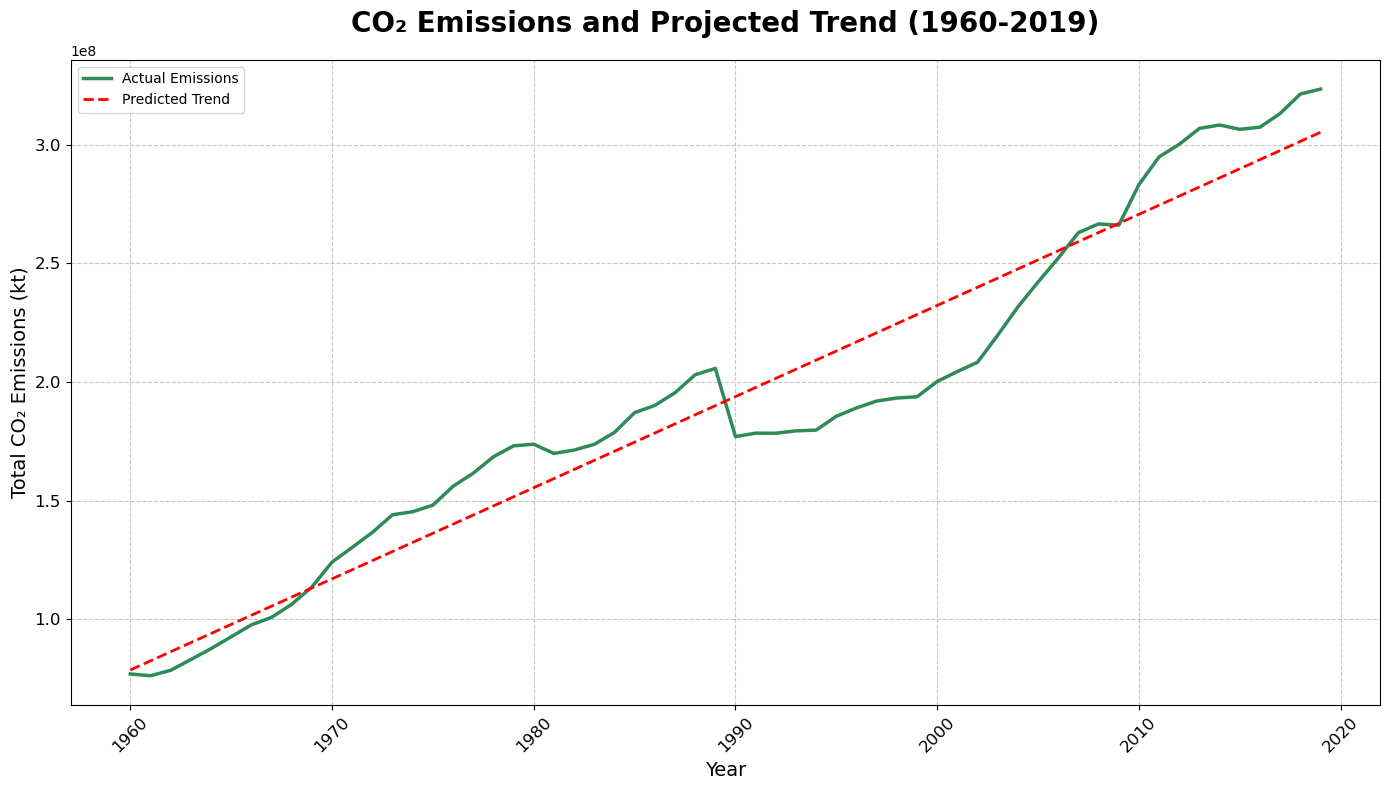

In [31]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Preparing year and emission data
years = np.array(yearly_total_emission.index).reshape(-1, 1)
emissions = np.array(yearly_total_emission.values)

# Linear regression model
model = LinearRegression()
model.fit(years, emissions)

# Calculate estimated emission values
predicted_emissions = model.predict(years)

# Creating graphics
plt.figure(figsize=(14, 8))

# Plotting actual emissions data
plt.plot(years, emissions, label='Actual Emissions', color='seagreen', linewidth=2.5)

# Plotting the estimated emissions trend
plt.plot(years, predicted_emissions, label='Predicted Trend', color='red', linestyle='--', linewidth=2)

# Title and tags
plt.title('CO₂ Emissions and Projected Trend (1960-2019)', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total CO₂ Emissions (kt)', fontsize=14)

# Graphic
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Graphical representation
plt.tight_layout()
plt.show()


In [35]:
asia = df[df['country_name'].str.contains('Asia')]['country_name'].unique()
europe = df[df['country_name'].str.contains('Euro')]['country_name'].unique()
caribbean = df[df['country_name'].str.contains('Caribbean')]['country_name'].unique()
africa = df[df['country_name'].str.contains('Africa')]['country_name'].unique() # remove South Africa
africa = africa[africa != 'South Africa']

demographic = df[df['country_name'].str.contains('demo')]['country_name'].unique()
ida = df[df['country_name'].str.contains('IDA')]['country_name'].unique()
ibrd = df[df['country_name'].str.contains('IBRD')]['country_name'].unique()

income = df[df['country_name'].str.contains('income')]['country_name'].unique()


other_regions = ['World', 'Europe', 'North America', 'South Asia', 'OECD members', 'Euro area', 'Arab World', 'Heavily indebted poor countries (HIPC)',
          'Small states','Other small states' , 'Fragile and conflict affected situations', 'Least developed countries: UN classification', 
          'Pacific island small states']

country_groups = np.concatenate((asia, europe, caribbean, africa, demographic, ida, ibrd,income, other_regions))

df_country = df.query("country_name not in @country_groups").copy() # Data with only countries for rows (no aggregates)

**Animated Map of Country CO2 Emissions Over Time**

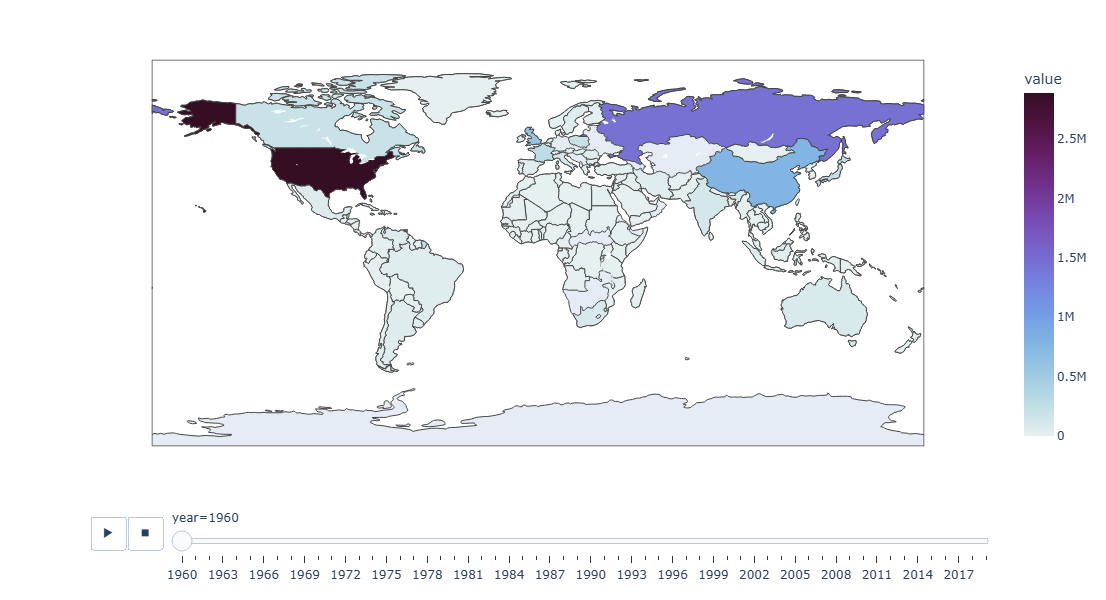

In [43]:
import plotly.express as px #library for creating interactive and visualized graphics

fig = px.choropleth(
    df_country,
    locations="country_code",
    animation_frame="year",
    animation_group="country_name",
    color="value",
    hover_name="country_name",
    hover_data=['year', 'country_name', 'value'],
    color_continuous_scale=px.colors.sequential.dense
)
fig.update_layout(
    width=1000,  # width
    height=600   # height
)

fig.show()
